# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the folloowing approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp -chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - (serum cholesterol in mg/dl)
6. fbs - (if fasting blood sugar > 120 mg/dl)
7. restecg - (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - [normal; fixed defect; reversible defect]
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [151]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [7]:
df = pd.read_csv("./data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# Lets find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

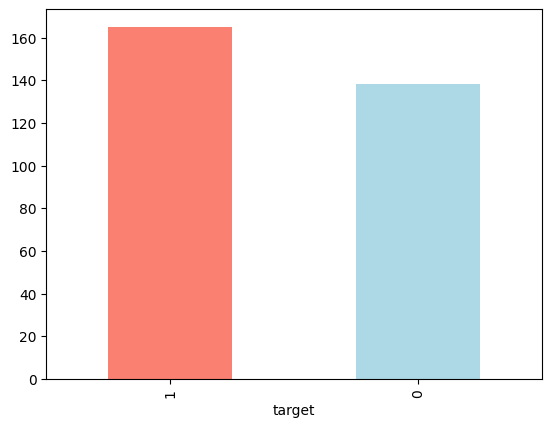

In [22]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
# Are there any missing values?
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [27]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [28]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


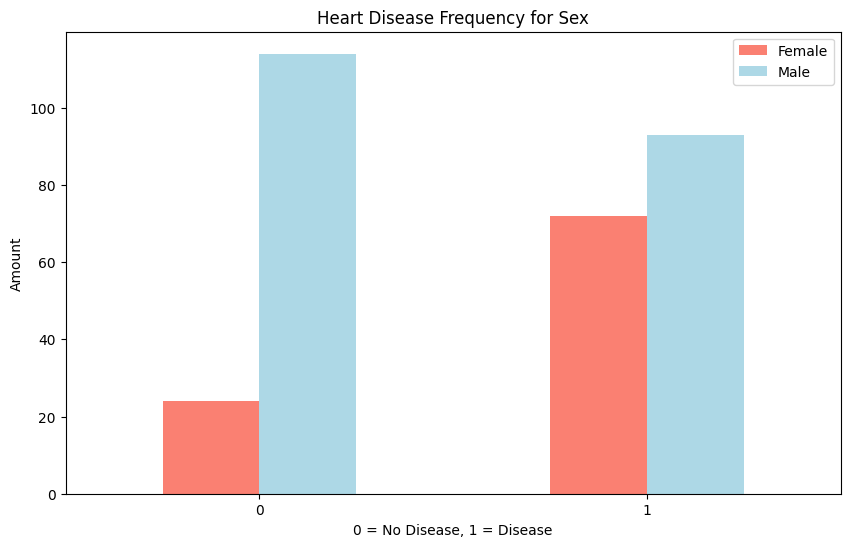

In [34]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

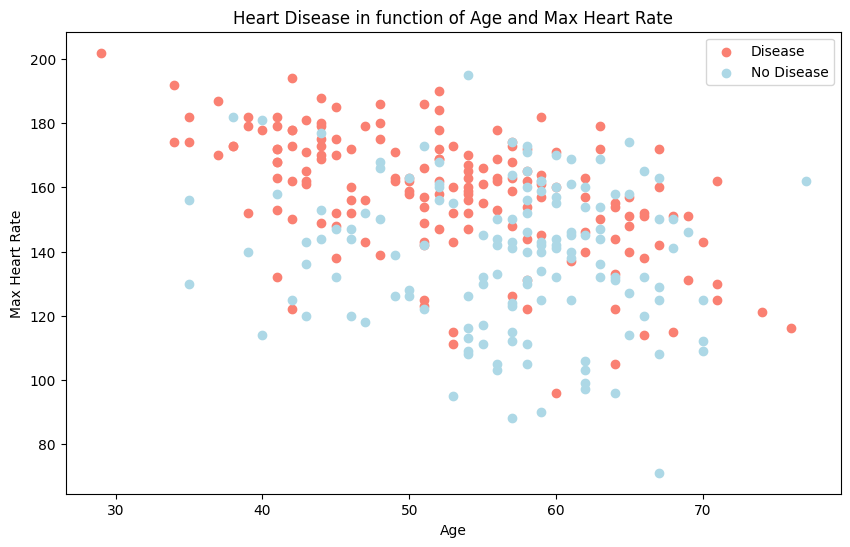

In [42]:
# Create another figure
plt.figure(figsize=(10, 6))


with_heart_disease = df["target"] == 1
without_heart_disease = df["target"] == 0

#Scatter with positive examples
plt.scatter(df["age"][with_heart_disease],
           df["thalach"][with_heart_disease],
           c="salmon");

#Scatter with negative examples
plt.scatter(df["age"][without_heart_disease],
            df["thalach"][without_heart_disease],
            c="lightblue");

# Add some helpfule info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

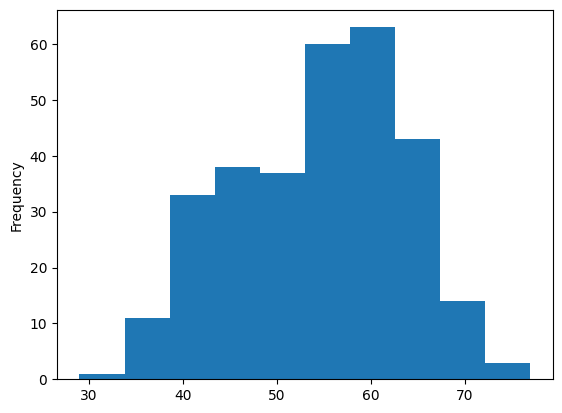

In [43]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency pre Chest Pain Type
cp -chest pain type 

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

In [44]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


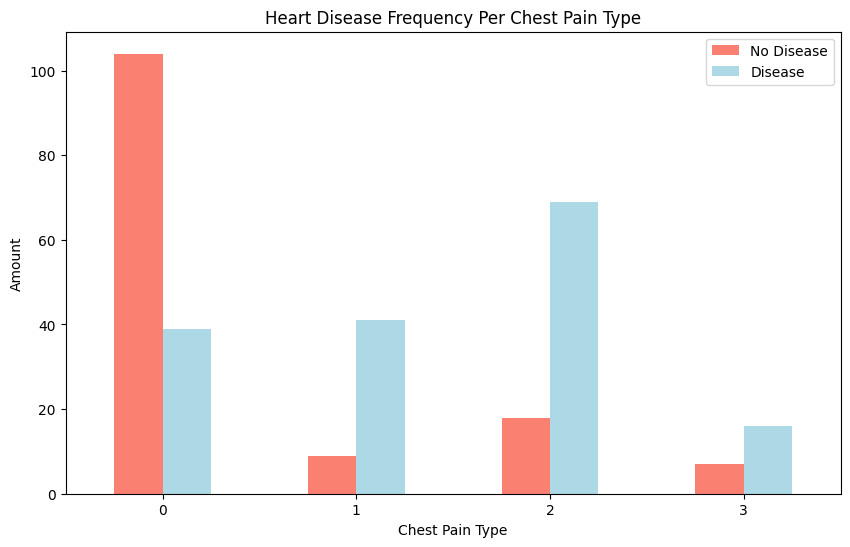

In [48]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


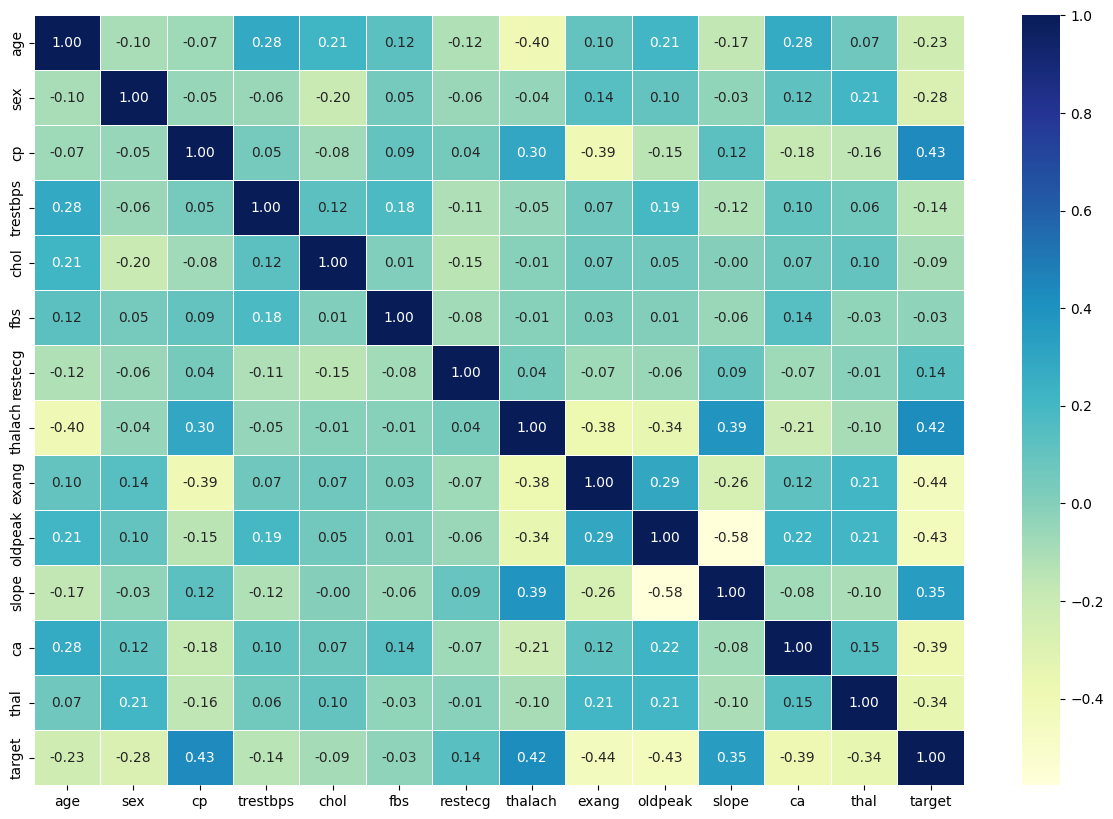

In [51]:
# Let's make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5. Modelling

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Split data into X and y
X = df.drop("target", axis=1)

# Scale data
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaled_X, columns=X.columns)

y = df["target"]

In [67]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [68]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test est
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-1.363869,0.681005,0.032031,-0.663867,0.941846,-0.417635,0.898962,0.540209,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
202,0.400752,0.681005,-0.938515,1.049520,0.458709,-0.417635,-1.005832,-1.690047,1.435481,-0.206705,0.976352,-0.714429,1.123029
196,-0.922713,0.681005,1.002577,1.049520,-0.294985,-0.417635,0.898962,-0.115749,-0.696631,2.208842,-0.649113,-0.714429,-0.512922
75,0.069886,-1.468418,0.032031,0.192827,0.072199,-0.417635,-1.005832,0.496478,-0.696631,0.310912,-0.649113,-0.714429,-0.512922
176,0.621330,0.681005,-0.938515,-0.835206,-0.314310,2.394438,0.898962,0.452748,1.435481,0.310912,0.976352,1.244593,1.123029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.681005,1.002577,0.478391,-0.256334,-0.417635,0.898962,0.583939,-0.696631,-0.379244,-0.649113,0.265082,1.123029
71,-0.371269,0.681005,1.002577,-2.148802,-0.372287,-0.417635,0.898962,0.190365,1.435481,-0.896862,0.976352,0.265082,1.123029
106,1.613930,0.681005,1.973123,1.620649,-0.237008,2.394438,-1.005832,-0.815437,-0.696631,-0.810592,-0.649113,0.265082,-0.512922
270,-0.922713,0.681005,-0.938515,-0.663867,0.052874,-0.417635,-1.005832,-0.246940,-0.696631,-0.206705,0.976352,-0.714429,1.123029


In [70]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got out data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [71]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_trian: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # set random seed
    np.random.seed(42)

    # make a dictionary to keep model scores
    model_scores = {}

    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        #evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [72]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9180327868852459,
 'Random Forest': 0.8360655737704918}

### Model Comparison

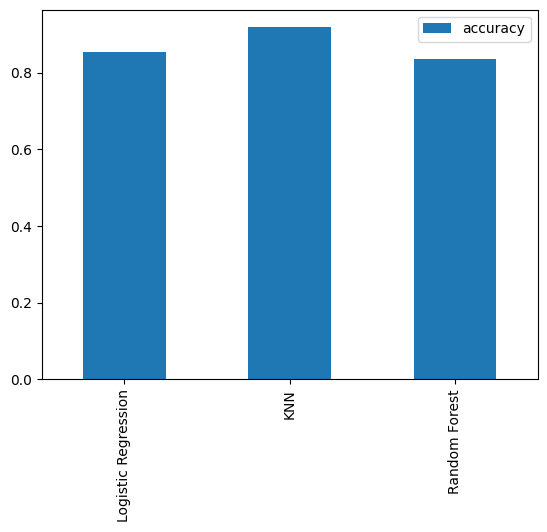

In [75]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baselien model... and we know a model's first predictions aren't always what we should base our next steps off.  What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [77]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [78]:
train_scores

[1.0,
 0.8842975206611571,
 0.8884297520661157,
 0.8512396694214877,
 0.8636363636363636,
 0.8553719008264463,
 0.859504132231405,
 0.871900826446281,
 0.859504132231405,
 0.8388429752066116,
 0.8264462809917356,
 0.8388429752066116,
 0.8553719008264463,
 0.8512396694214877,
 0.8512396694214877,
 0.8471074380165289,
 0.8388429752066116,
 0.8512396694214877,
 0.8347107438016529,
 0.8388429752066116]

In [79]:
test_scores

[0.8524590163934426,
 0.819672131147541,
 0.8688524590163934,
 0.8852459016393442,
 0.9180327868852459,
 0.9344262295081968,
 0.9180327868852459,
 0.8524590163934426,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442]

Maximum KNN score on the test date: 93.44%


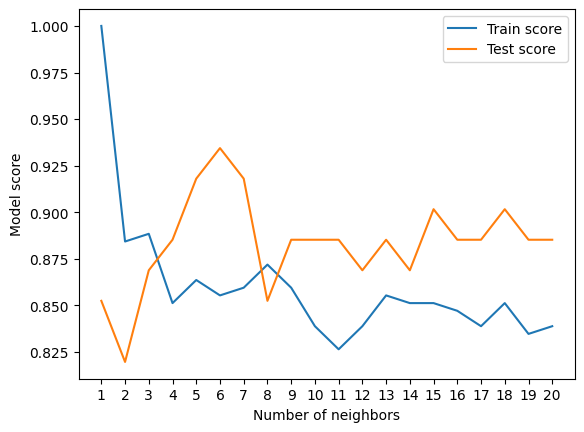

In [81]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test date: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
  
... using RandomizedSearchCV

In [128]:
# Create a hyperparameter grid for KNeighbors
knn_grid = {"n_neighbors": [5, 6, 7, 8, 9],
            "leaf_size": np.arange(1, 30, 2)}

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5,10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [129]:
# Tune KNeighbors

np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
rs_kn = RandomizedSearchCV(KNeighborsClassifier(),
                               param_distributions=knn_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for KNeighborsClassifier
rs_kn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'n_neighbors': [5, 6, 7, 8, 9]},
                   verbose=True)

In [130]:
rs_kn.best_params_

{'n_neighbors': 6, 'leaf_size': 25}

In [131]:
rs_kn.score(X_test, y_test)

0.9344262295081968

In [85]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [86]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [87]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [91]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [94]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [95]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

Since our KNeighborsClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [132]:
# Different hyperparameters for our KNeighborsClassifier model
knn_grid = {"n_neighbors": [5, 6, 7, 8, 9, 10, 11],
            "leaf_size": np.arange(1, 30, 2)}

# Setup grid hyperparameter search for KNeighborsClassifier
gs_kn = GridSearchCV(KNeighborsClassifier(),
                    param_grid=knn_grid,
                    cv=5,
                    verbose=True)

# Fit grid hyperparameter search model
gs_kn.fit(X_train, y_train);

Fitting 5 folds for each of 105 candidates, totalling 525 fits


In [133]:
# Check the best hyperparameters
gs_kn.best_params_

{'leaf_size': 1, 'n_neighbors': 6}

In [134]:
# Evaluate the grid search KNeighborsClassifier model
gs_kn.score(X_test, y_test)

0.9344262295081968

In [135]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9180327868852459,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate out trained model, first we need to make predictions.

In [136]:
# Make predictions with tuned model
y_preds = gs_kn.predict(X_test)

In [137]:
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [138]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

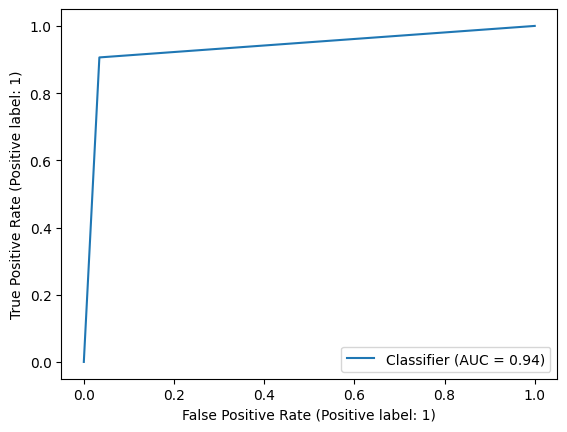

In [145]:
# Plot ROC curve and calculate and calculate the AUC metric
RocCurveDisplay.from_predictions(y_test,y_preds)
plt.show()

In [154]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds, labels=gs_kn.classes_)
cm

array([[28,  1],
       [ 3, 29]])

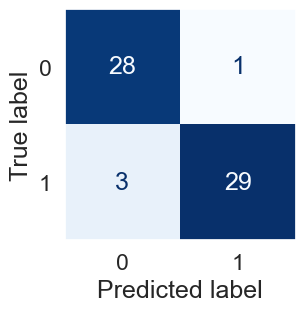

In [169]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax.grid(False)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds,labels=gs_kn.classes_, ax=ax, colorbar=False,cmap="Blues");

Now we've got a ROC curve, an AUC metric and a cofusion matrix.  Let's get a classification report as well as cross-validated precision, recall and f1-score.

In [171]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [173]:
# Check best hyperparameters]
gs_kn.best_params_

{'leaf_size': 1, 'n_neighbors': 6}

In [204]:
# Create a new classifier with best parameters
clf = KNeighborsClassifier(n_neighbors=6,leaf_size=1)

In [224]:
metrics = {"Accuracy": "accuracy",
          "Precision": "precision",
          "Recall":"recall",
          "F1":"f1"}

# Cross Validate
def get_cross_validate_scores(clf,X,y,iter,metrics):
    output = {}

    for name, metric_type in metrics.items():
        cv = cross_val_score(clf, X, y, cv=iter, scoring=metric_type)
        output[name] = np.mean(cv)

    return output

cv_metrics = pd.DataFrame(get_cross_validate_scores(clf, X, y, 10, metrics), index=[0])

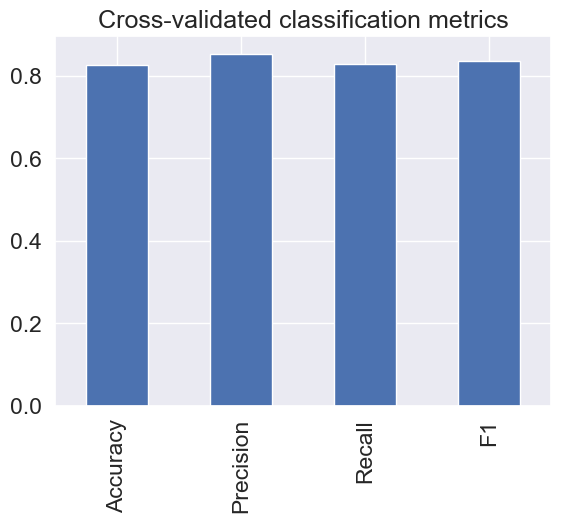

In [225]:
# Visualize cross-validated metrics
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes fo the model and how did they contribute?"

Finding feature importance is different for each machine learning model.
One way to find feature importance is to search for "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression model because there are not coeficients for KNN and this is practice

In [227]:
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train, y_train);

In [228]:
clf.coef_

array([[-0.09694001, -0.62851799,  0.67956519, -0.22571133, -0.12366511,
         0.07330283,  0.21471338,  0.35506777, -0.47115945, -0.59052023,
         0.37891231, -0.66801775, -0.49732156]])

In [229]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.09694000560857254,
 'sex': -0.6285179898131766,
 'cp': 0.6795651852259322,
 'trestbps': -0.22571132749177408,
 'chol': -0.12366511056156496,
 'fbs': 0.07330283445854231,
 'restecg': 0.21471338114967012,
 'thalach': 0.3550677657908326,
 'exang': -0.47115944706695884,
 'oldpeak': -0.5905202260771821,
 'slope': 0.3789123068728118,
 'ca': -0.6680177531091707,
 'thal': -0.49732155682482676}

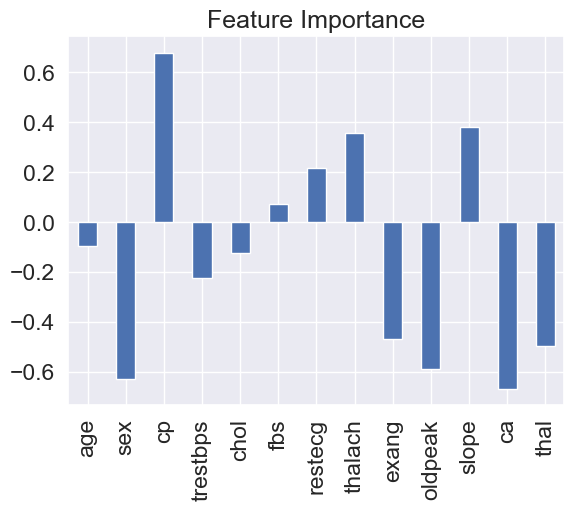

In [231]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [232]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [233]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric)
How would you export it and share it with others?